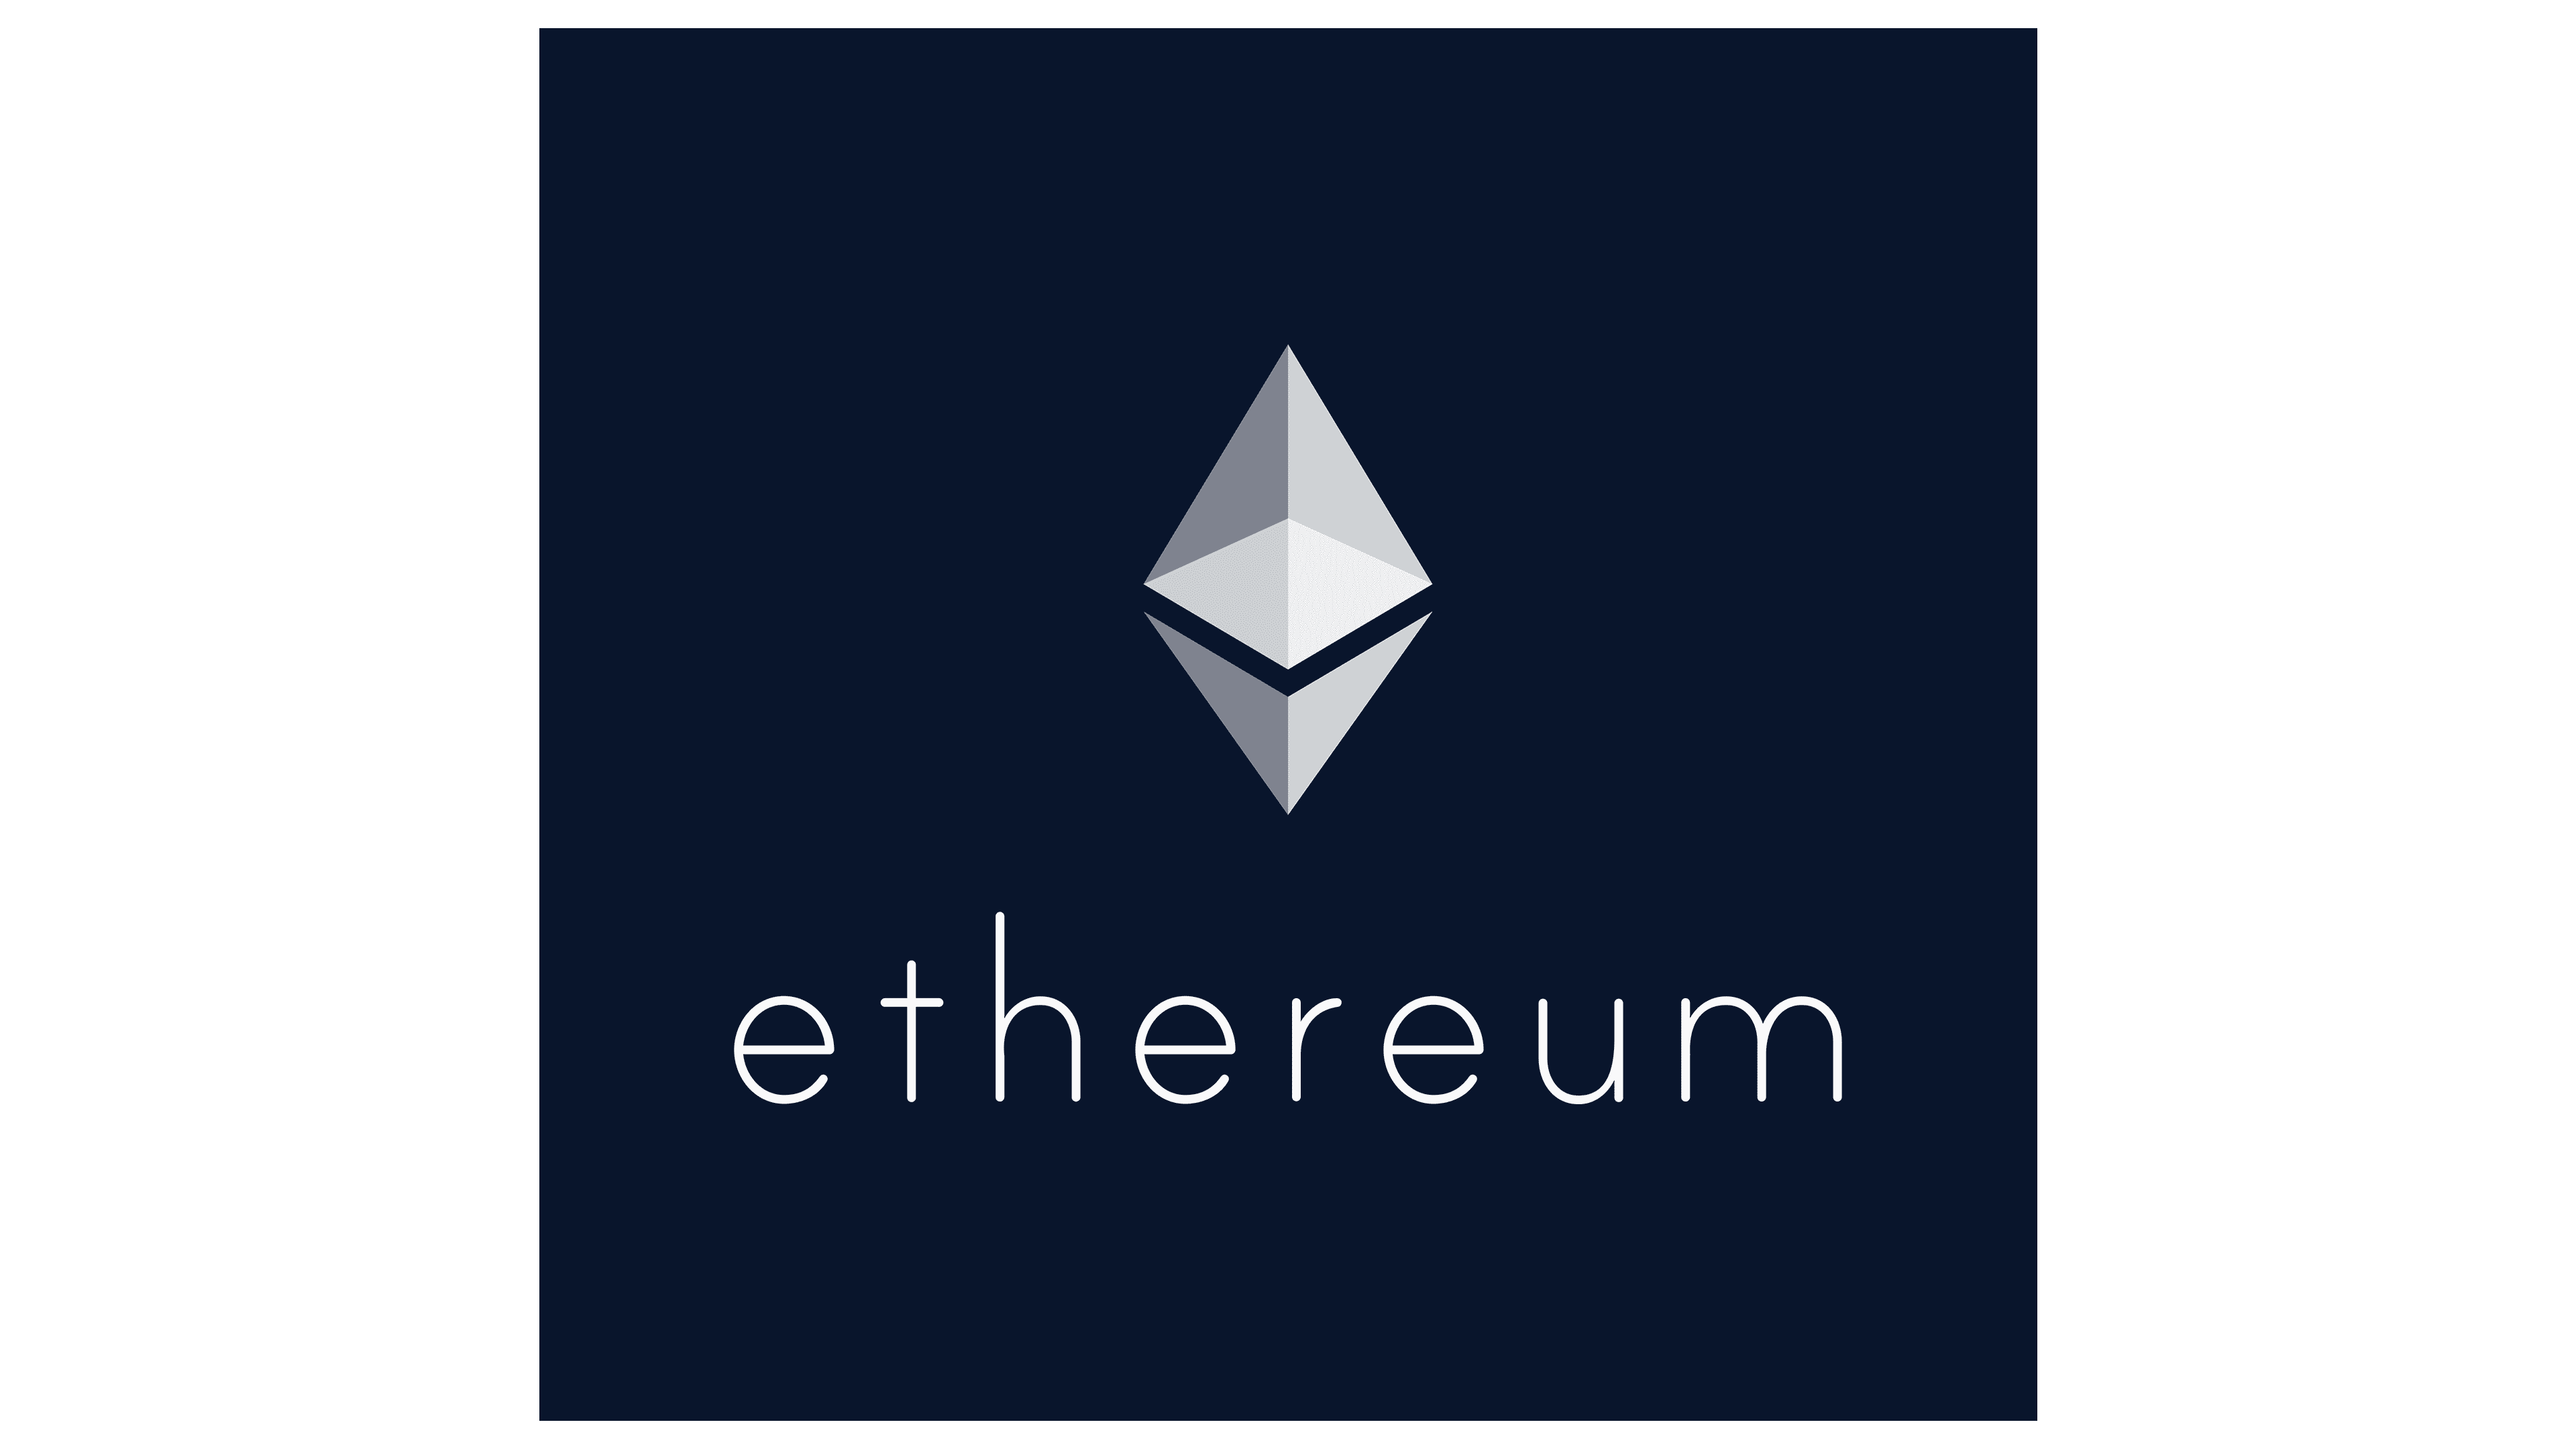

# 8 Years of Ethereum


---








Introduction to "8 Years of Ethereum"
Ethereum, since its inception in 2015, has emerged as a pivotal technology in the blockchain and cryptocurrency space. This Jupyter notebook aims to delve into an eight-year journey of Ethereum, exploring its evolution, technological advancements, and its impact on the world of decentralized applications and finance.

Objectives
In this analysis, we will:

Examine Ethereum's Growth: We will look at various metrics such as the number of transactions, smart contract deployments, and network usage to understand Ethereum's growth trajectory over the years.

Analyze Technological Milestones: Ethereum has undergone significant updates and shifts, such as the transition to Ethereum 2.0. We will explore these milestones and their implications.

Assess Market Impact: Understanding how Ethereum has influenced the cryptocurrency market and the broader financial ecosystem will be a key focus.

Data and Methodology
Our analysis is grounded in data collected from various reliable sources over the past eight years. This includes transaction data, network statistics, and market performance metrics. The methodology involves a combination of data visualization, statistical analysis, and machine learning techniques to uncover patterns and insights.

Significance
Ethereum's journey is not just about a cryptocurrency but about how it has pioneered the concept of a programmable blockchain, leading to innovations like decentralized finance (DeFi) and non-fungible tokens (NFTs). This study aims to provide a comprehensive understanding of Ethereum's role in shaping the digital asset landscape

---




By: John Chilton

---



# Loading the Libararies

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import yfinance as yf
import datetime

# Define the ticker symbol for Ethereum
ticker_symbol = "ETH-USD"

# Define the time period: 8 years from today
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365 * 8)

# Use yfinance to download the data
ethereum_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
ethereum_data.to_csv('/content/drive/MyDrive//ethereum_data_8_years.csv')

print(ethereum_data.head())  # Display the first few rows of the dataset for confirmation

[*********************100%%**********************]  1 of 1 completed
              Open    High     Low   Close  Adj Close      Volume
Date                                                             
2017-11-09 308.645 329.452 307.056 320.884    320.884   893249984
2017-11-10 320.671 324.718 294.542 299.253    299.253   885985984
2017-11-11 298.586 319.453 298.192 314.681    314.681   842300992
2017-11-12 314.690 319.153 298.513 307.908    307.908  1613479936
2017-11-13 307.025 328.415 307.025 316.716    316.716  1041889984


In [ ]:
df = pd.read_csv('/content/drive/MyDrive//ethereum_data_8_years.csv')



1.   Observations
2.   Sanity Checks



In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.645,329.452,307.056,320.884,320.884,893249984
1,2017-11-10,320.671,324.718,294.542,299.253,299.253,885985984
2,2017-11-11,298.586,319.453,298.192,314.681,314.681,842300992
3,2017-11-12,314.690,319.153,298.513,307.908,307.908,1613479936
4,2017-11-13,307.025,328.415,307.025,316.716,316.716,1041889984
5,2017-11-14,316.763,340.177,316.763,337.631,337.631,1069680000
6,2017-11-15,337.964,340.912,329.813,333.357,333.357,722665984
7,2017-11-16,333.443,336.159,323.606,330.924,330.924,797254016
8,2017-11-17,330.167,334.964,327.523,332.394,332.394,621732992
9,2017-11-18,331.980,349.616,327.687,347.612,347.612,649638976


In [ ]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2244,2024-01-01,2282.870,2352.328,2267.018,2352.328,2352.328,6906765990
2245,2024-01-02,2352.594,2431.212,2348.892,2355.836,2355.836,12910543630
2246,2024-01-03,2355.981,2385.118,2113.925,2210.762,2210.762,19332933581
2247,2024-01-04,2210.529,2294.608,2204.866,2269.038,2269.038,11044564896
2248,2024-01-05,2269.409,2276.765,2209.537,2268.647,2268.647,10860953290
2249,2024-01-06,2269.540,2271.359,2219.782,2241.625,2241.625,5970741680
2250,2024-01-07,2242.013,2257.128,2211.562,2222.866,2222.866,6490053615
2251,2024-01-08,2222.858,2358.816,2171.994,2333.033,2333.033,13830287095
2252,2024-01-09,2332.868,2369.642,2243.219,2344.827,2344.827,14891130716
2253,2024-01-10,2344.924,2626.977,2341.943,2582.104,2582.104,29042100476


In [ ]:
df.shape

(2254, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2254 non-null   object 
 1   Open       2254 non-null   float64
 2   High       2254 non-null   float64
 3   Low        2254 non-null   float64
 4   Close      2254 non-null   float64
 5   Adj Close  2254 non-null   float64
 6   Volume     2254 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 123.4+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2254.000,1242.092,1117.943,84.280,231.299,994.277,1865.366,4810.071
High,2254.000,1277.781,1150.112,85.343,236.432,1067.746,1895.619,4891.705
Low,2254.000,1202.820,1081.566,82.830,226.833,923.238,1832.687,4718.039
Close,2254.000,1242.901,1117.722,84.308,231.244,1000.490,1865.612,4812.087
Adj Close,2254.000,1242.901,1117.722,84.308,231.244,1000.490,1865.612,4812.087
Volume,2254.000,12044361323.291,10140607801.540,621732992.000,4836624834.500,9364417640.000,16575340523.750,84482912776.000


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.mean()

Open               1242.092
High               1277.781
Low                1202.820
Close              1242.901
Adj Close          1242.901
Volume      12044361323.291
dtype: float64

In [ ]:
df.median()

Open               994.277
High              1067.746
Low                923.238
Close             1000.490
Adj Close         1000.490
Volume      9364417640.000
dtype: float64

In [ ]:
df.mode()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,205.174,1919.264,1564.032,84.308,84.308,621732992
1,2017-11-10,NaN,NaN,NaN,84.441,84.441,649638976
2,2017-11-11,NaN,NaN,NaN,85.262,85.262,722665984
3,2017-11-12,NaN,NaN,NaN,86.539,86.539,797254016
4,2017-11-13,NaN,NaN,NaN,88.945,88.945,800819008
...,...,...,...,...,...,...,...
2249,2024-01-06,NaN,NaN,NaN,4651.460,4651.460,62691789007
2250,2024-01-07,NaN,NaN,NaN,4667.115,4667.115,67610826680
2251,2024-01-08,NaN,NaN,NaN,4730.384,4730.384,69023382175
2252,2024-01-09,NaN,NaN,NaN,4735.069,4735.069,78398214539


In [ ]:
df.std()

Open               1117.943
High               1150.112
Low                1081.566
Close              1117.722
Adj Close          1117.722
Volume      10140607801.540
dtype: float64

In [ ]:
# Checking the summary of the categorical features in the dataset
df.describe(include=["object"]).T

,count,unique,top,freq
Date,2254,2254,2017-11-09,1


In [ ]:
# Looping through each column in the DataFrame that has an object data type
for i in df.describe(include=["object"]).columns:
    # Printing the name of the column
    print("Unique values in", i, "are :")
    # Printing the count of unique values in the column
    print(df[i].value_counts())
    # Printing a separator line of asterisks for better readability
    print("*" * 50);

Unique values in Date are :
2017-11-09    1
2021-12-23    1
2021-12-17    1
2021-12-18    1
2021-12-19    1
             ..
2019-11-24    1
2019-11-23    1
2019-11-22    1
2019-11-21    1
2024-01-10    1
Name: Date, Length: 2254, dtype: int64
**************************************************


In [ ]:
# Remove the column 'Open'
#df.drop('Open', axis=1, inplace=True)

In [ ]:
# Remove the column 'Close'
df.drop('Close', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

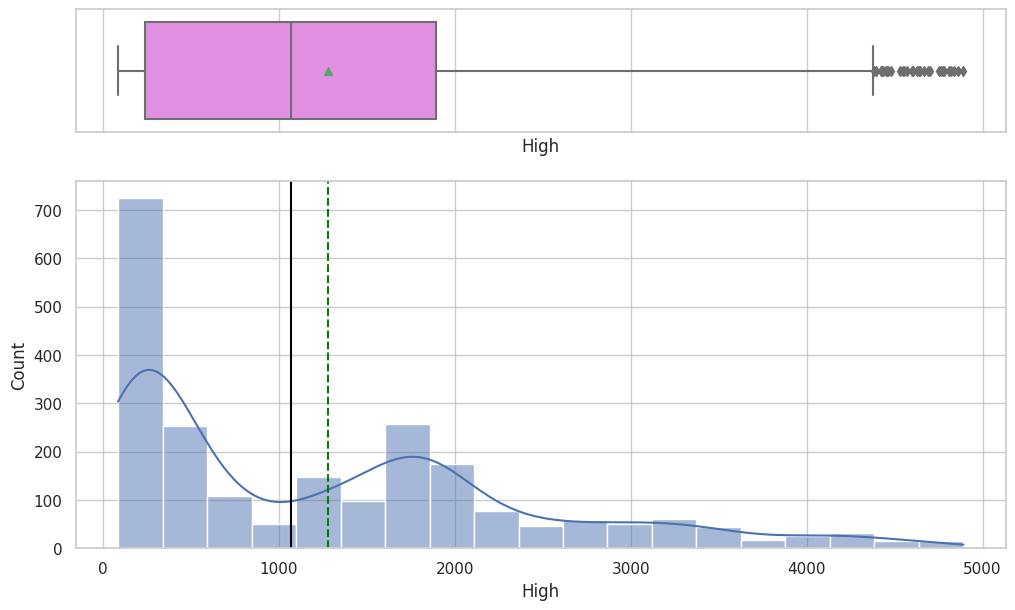

In [ ]:
# Histogram and Boxplot of High
histogram_boxplot(df, "High", kde=True);

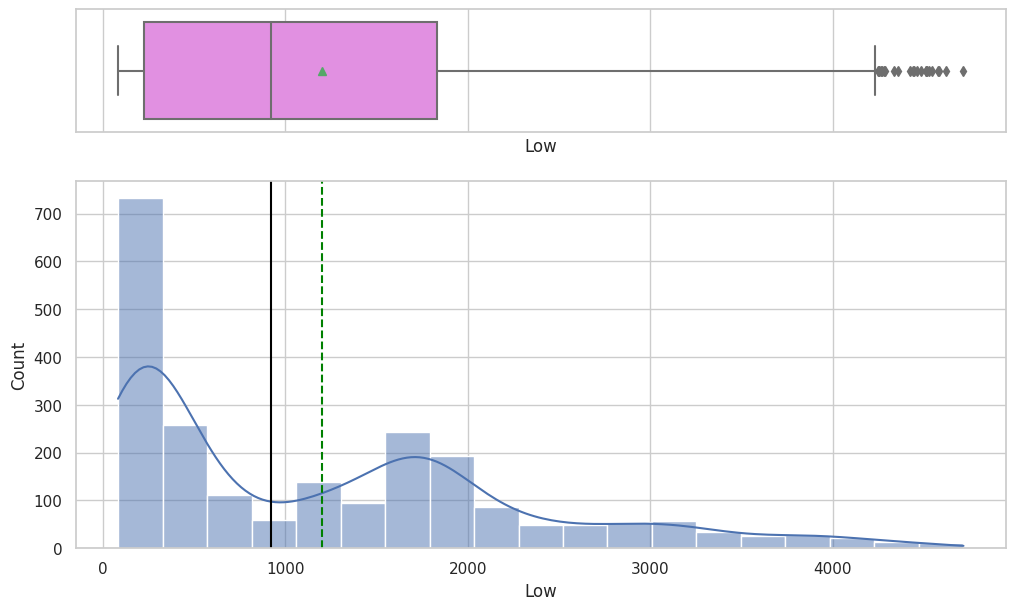

In [ ]:
# Histogram and Boxplot of Low
histogram_boxplot(df, "Low", kde=True);

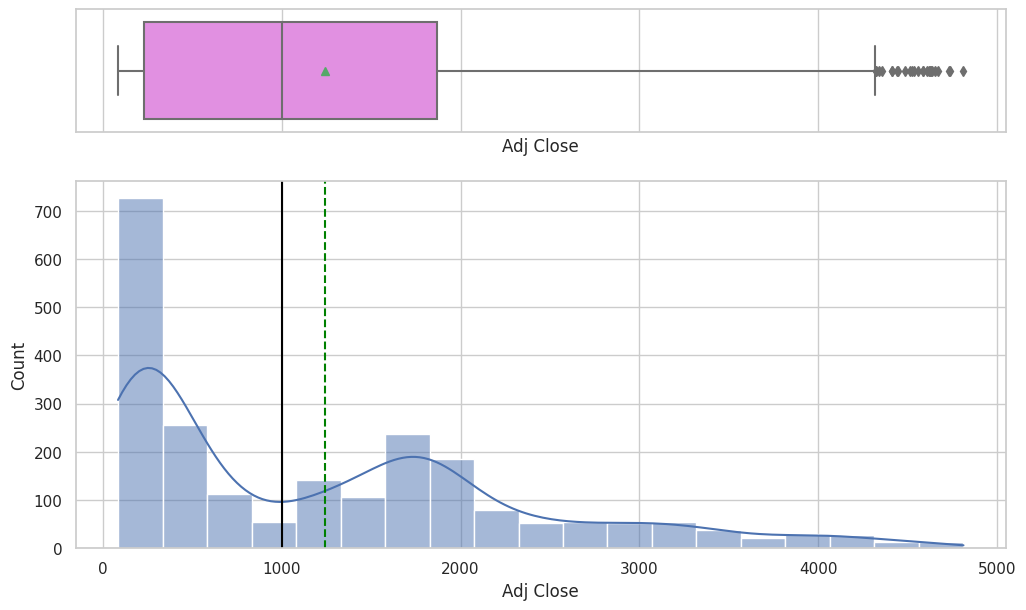

In [ ]:
# Histogram and Boxplot of Adj Close
histogram_boxplot(df, "Adj Close", kde=True);

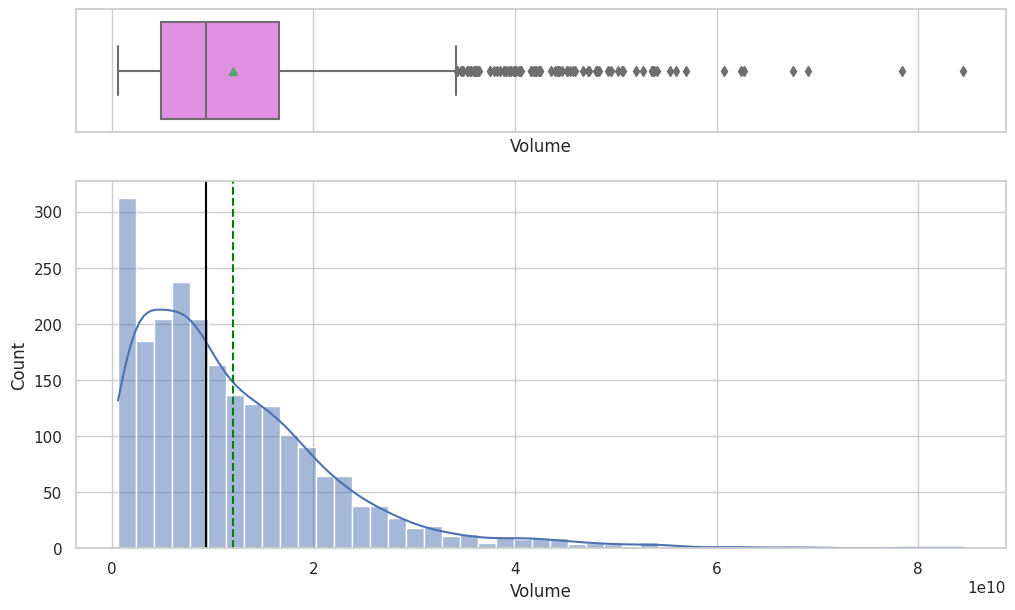

In [ ]:
# Histogram and Boxplot of Volume
histogram_boxplot(df, "Volume", kde=True);

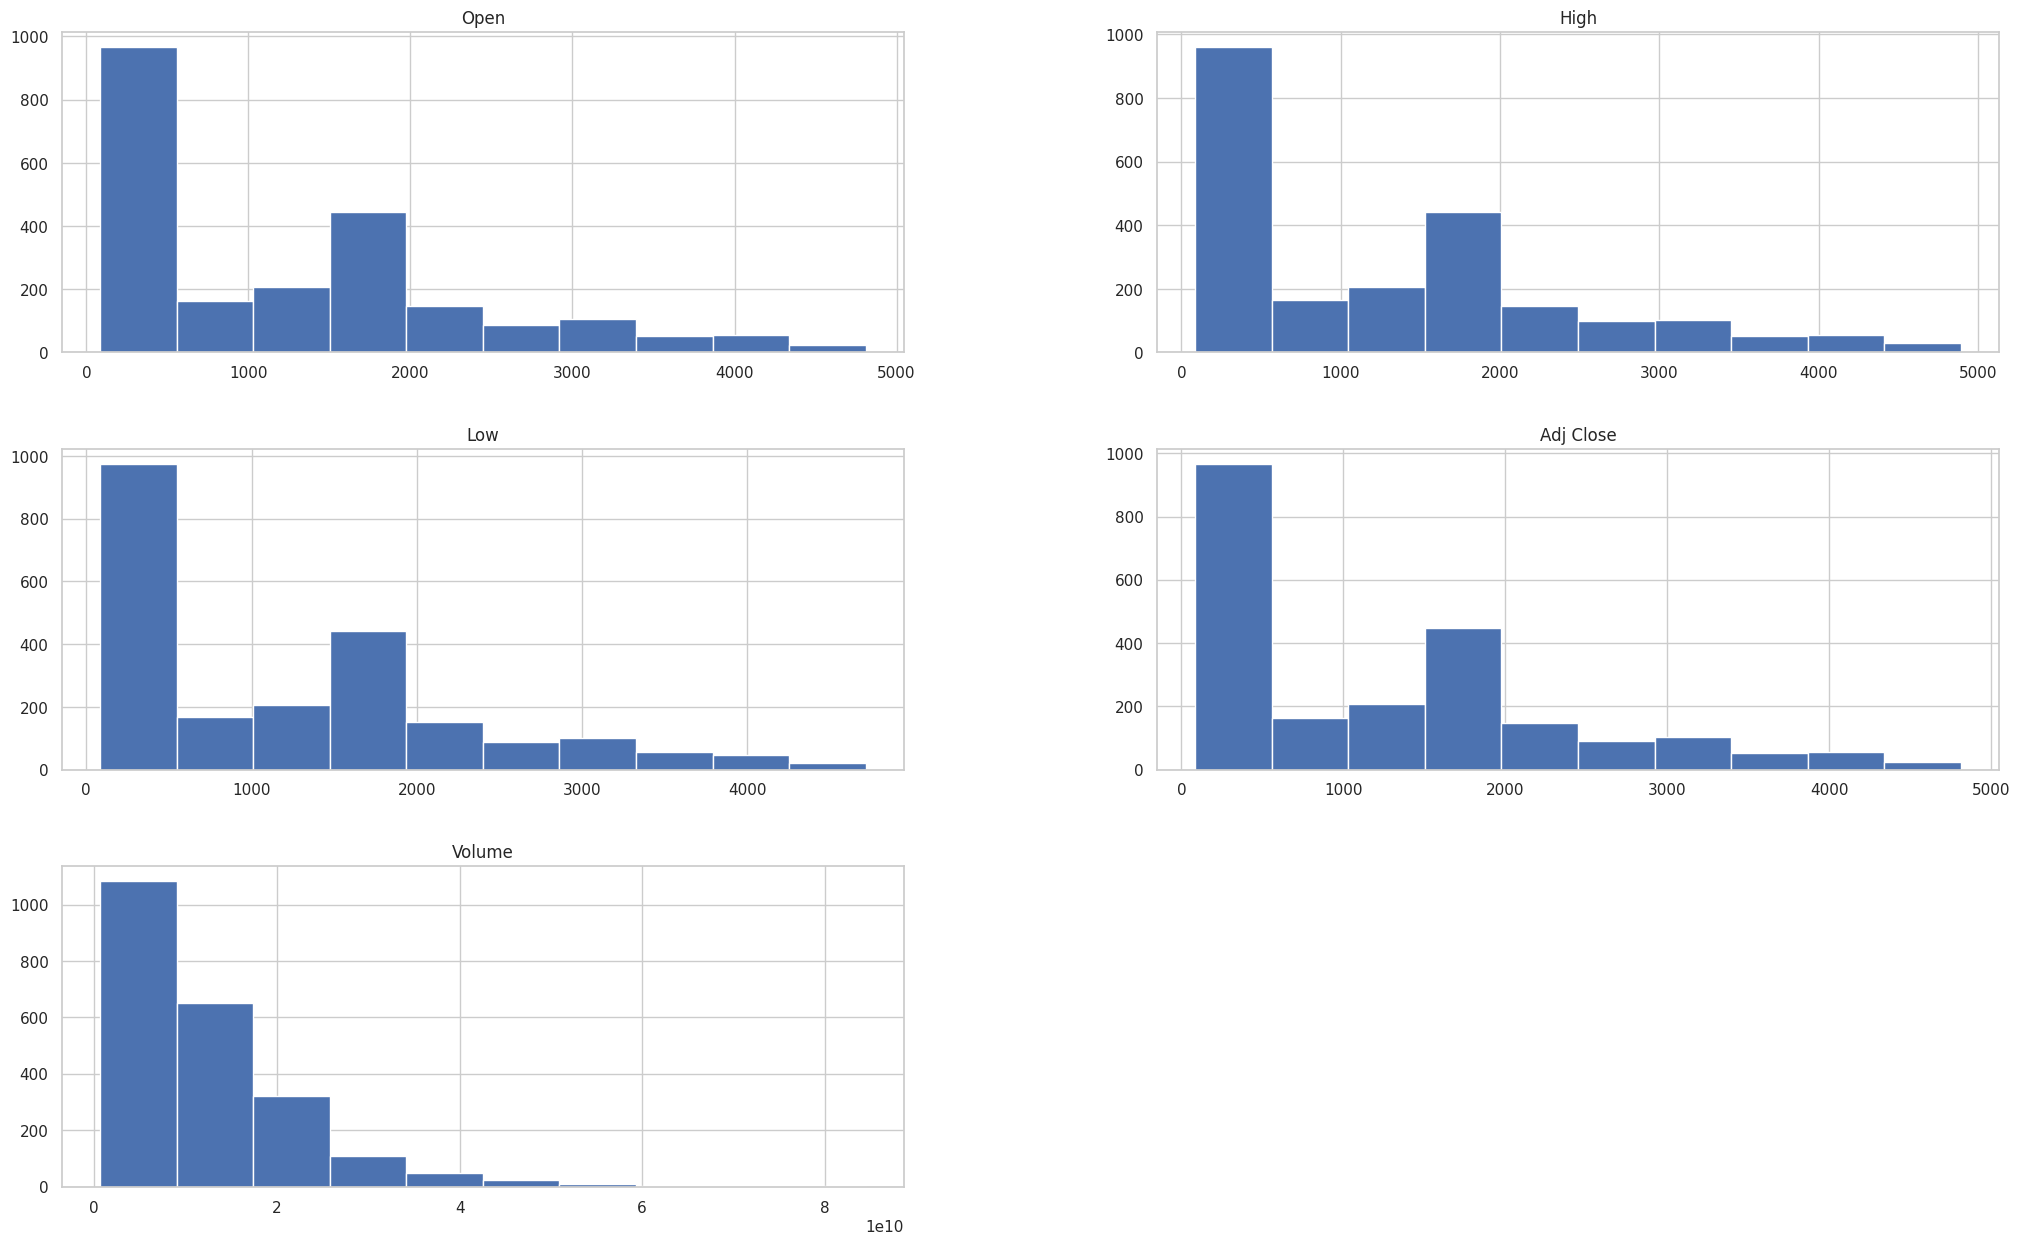

In [ ]:
# Histogram of the data
df.hist(figsize=(25,15))
plt.show();

### Bivariate Distributions

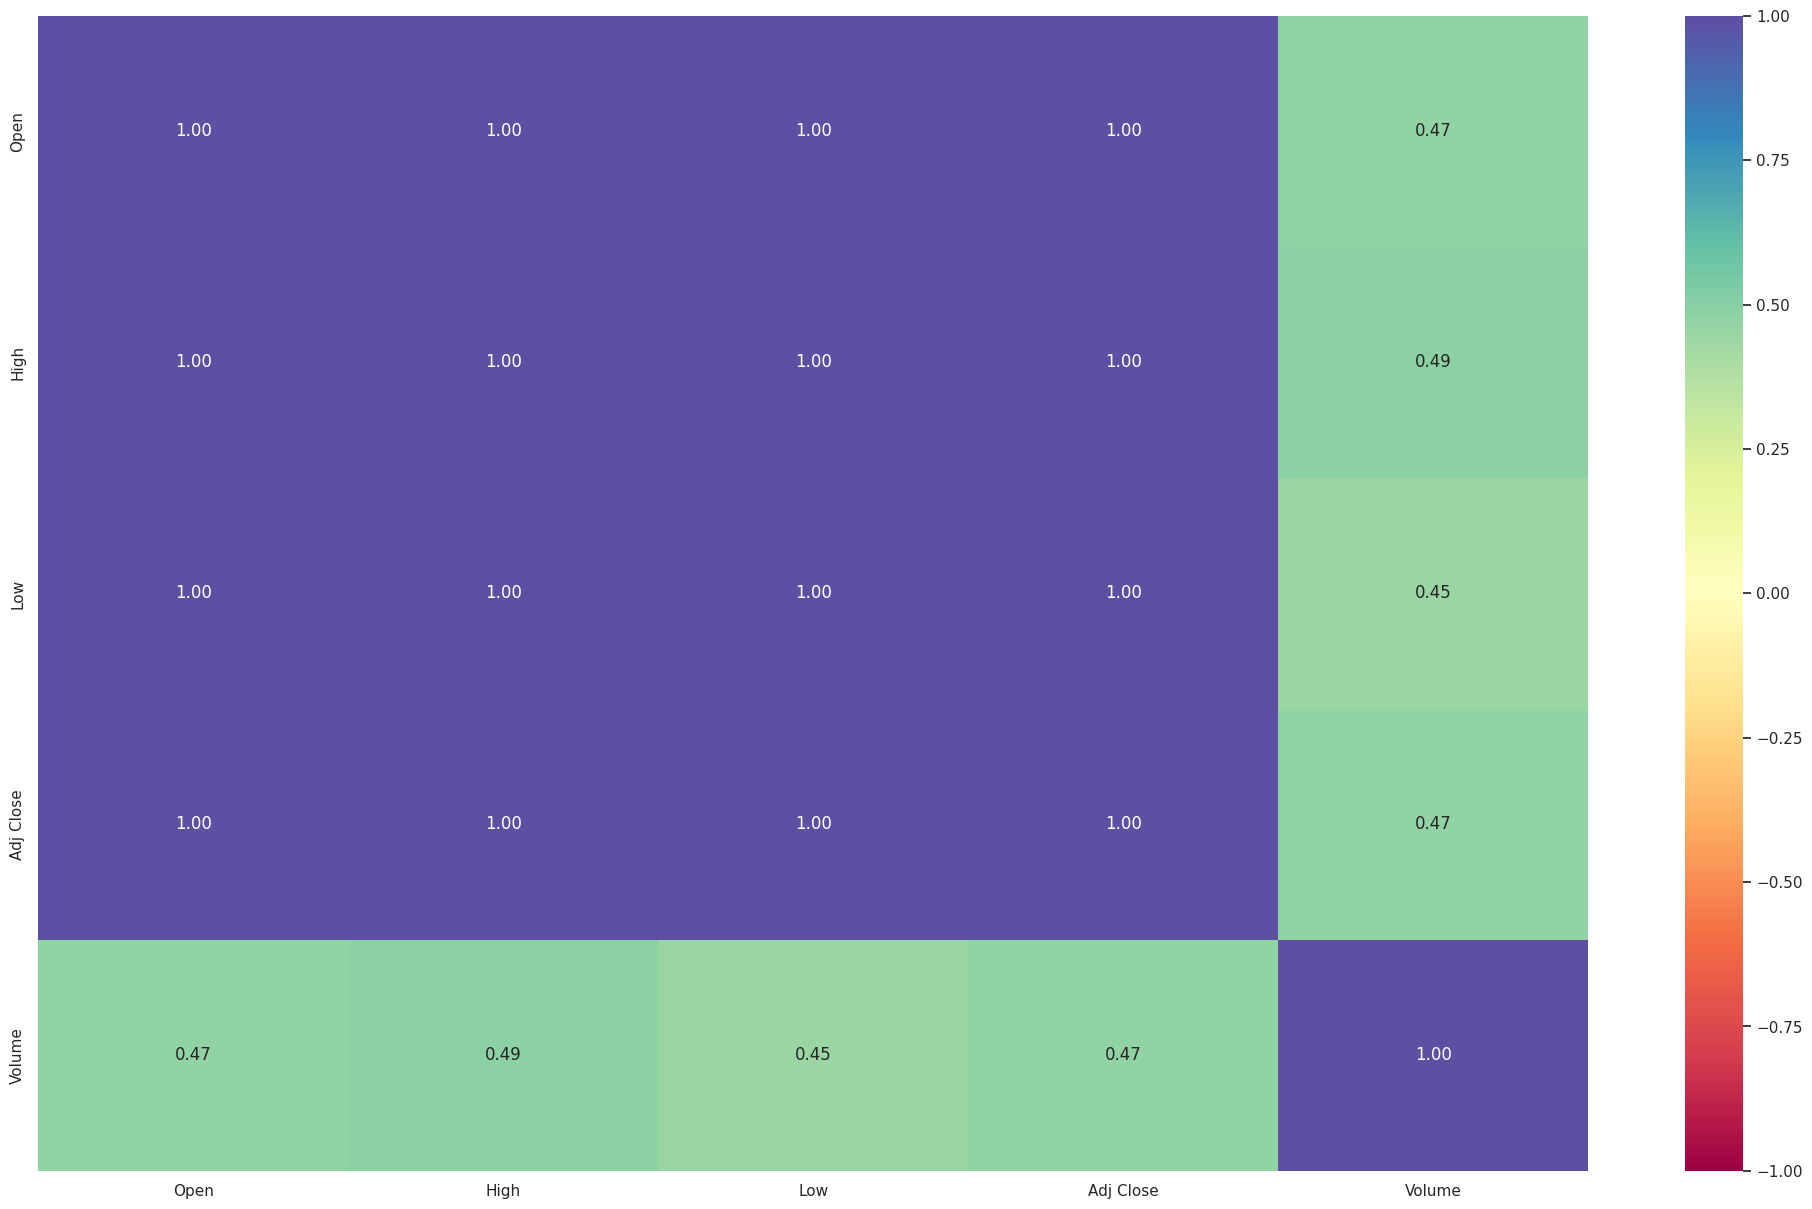

In [ ]:
# Heatmap of the data set to look for corrilations in the data.
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();

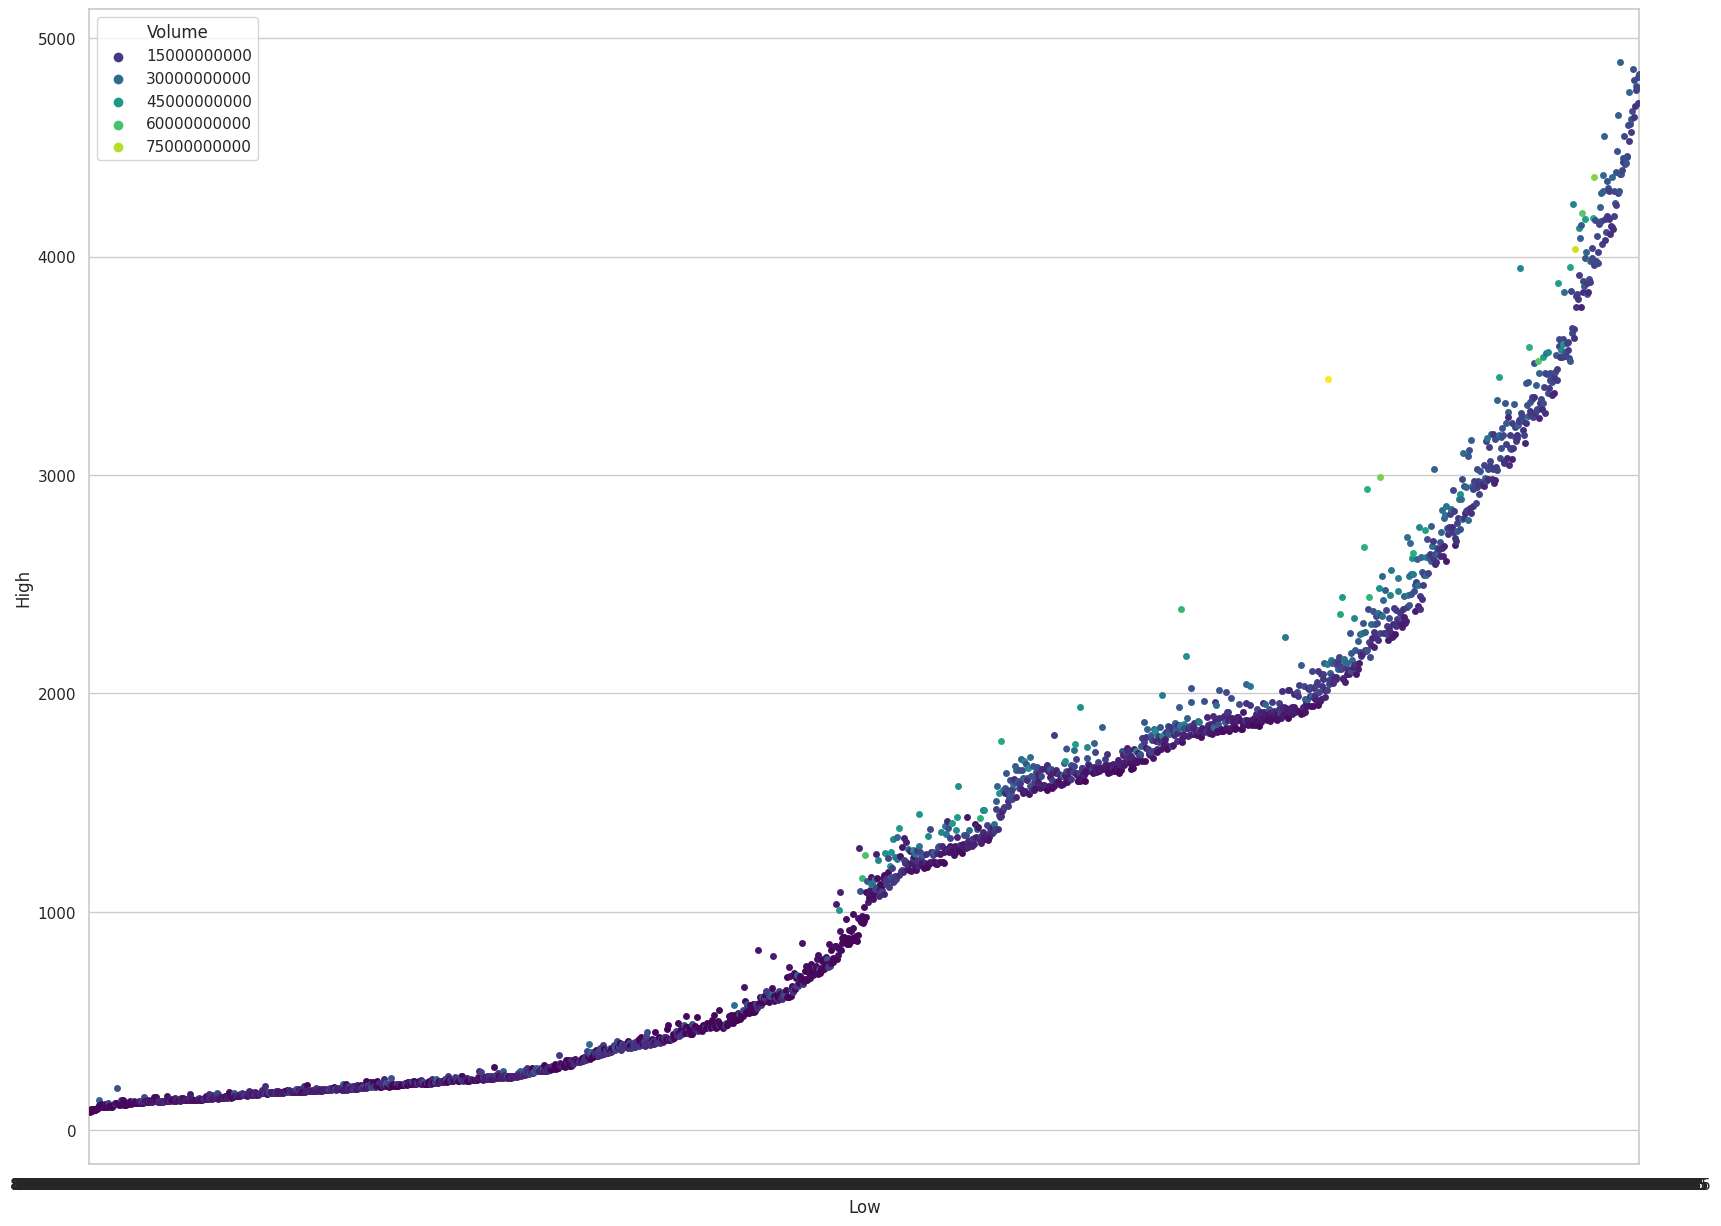

In [ ]:
# Swarmplot of education, Open and Volume.

# Set the figure size
plt.figure(figsize=(20,15))  # Adjust the values (10, 6) as desired

# Create the swarm plot with color based on 'Volume'
sns.swarmplot(data=df, x='Low', y='High', hue='Volume', palette='viridis')

# Show the plot
plt.show();

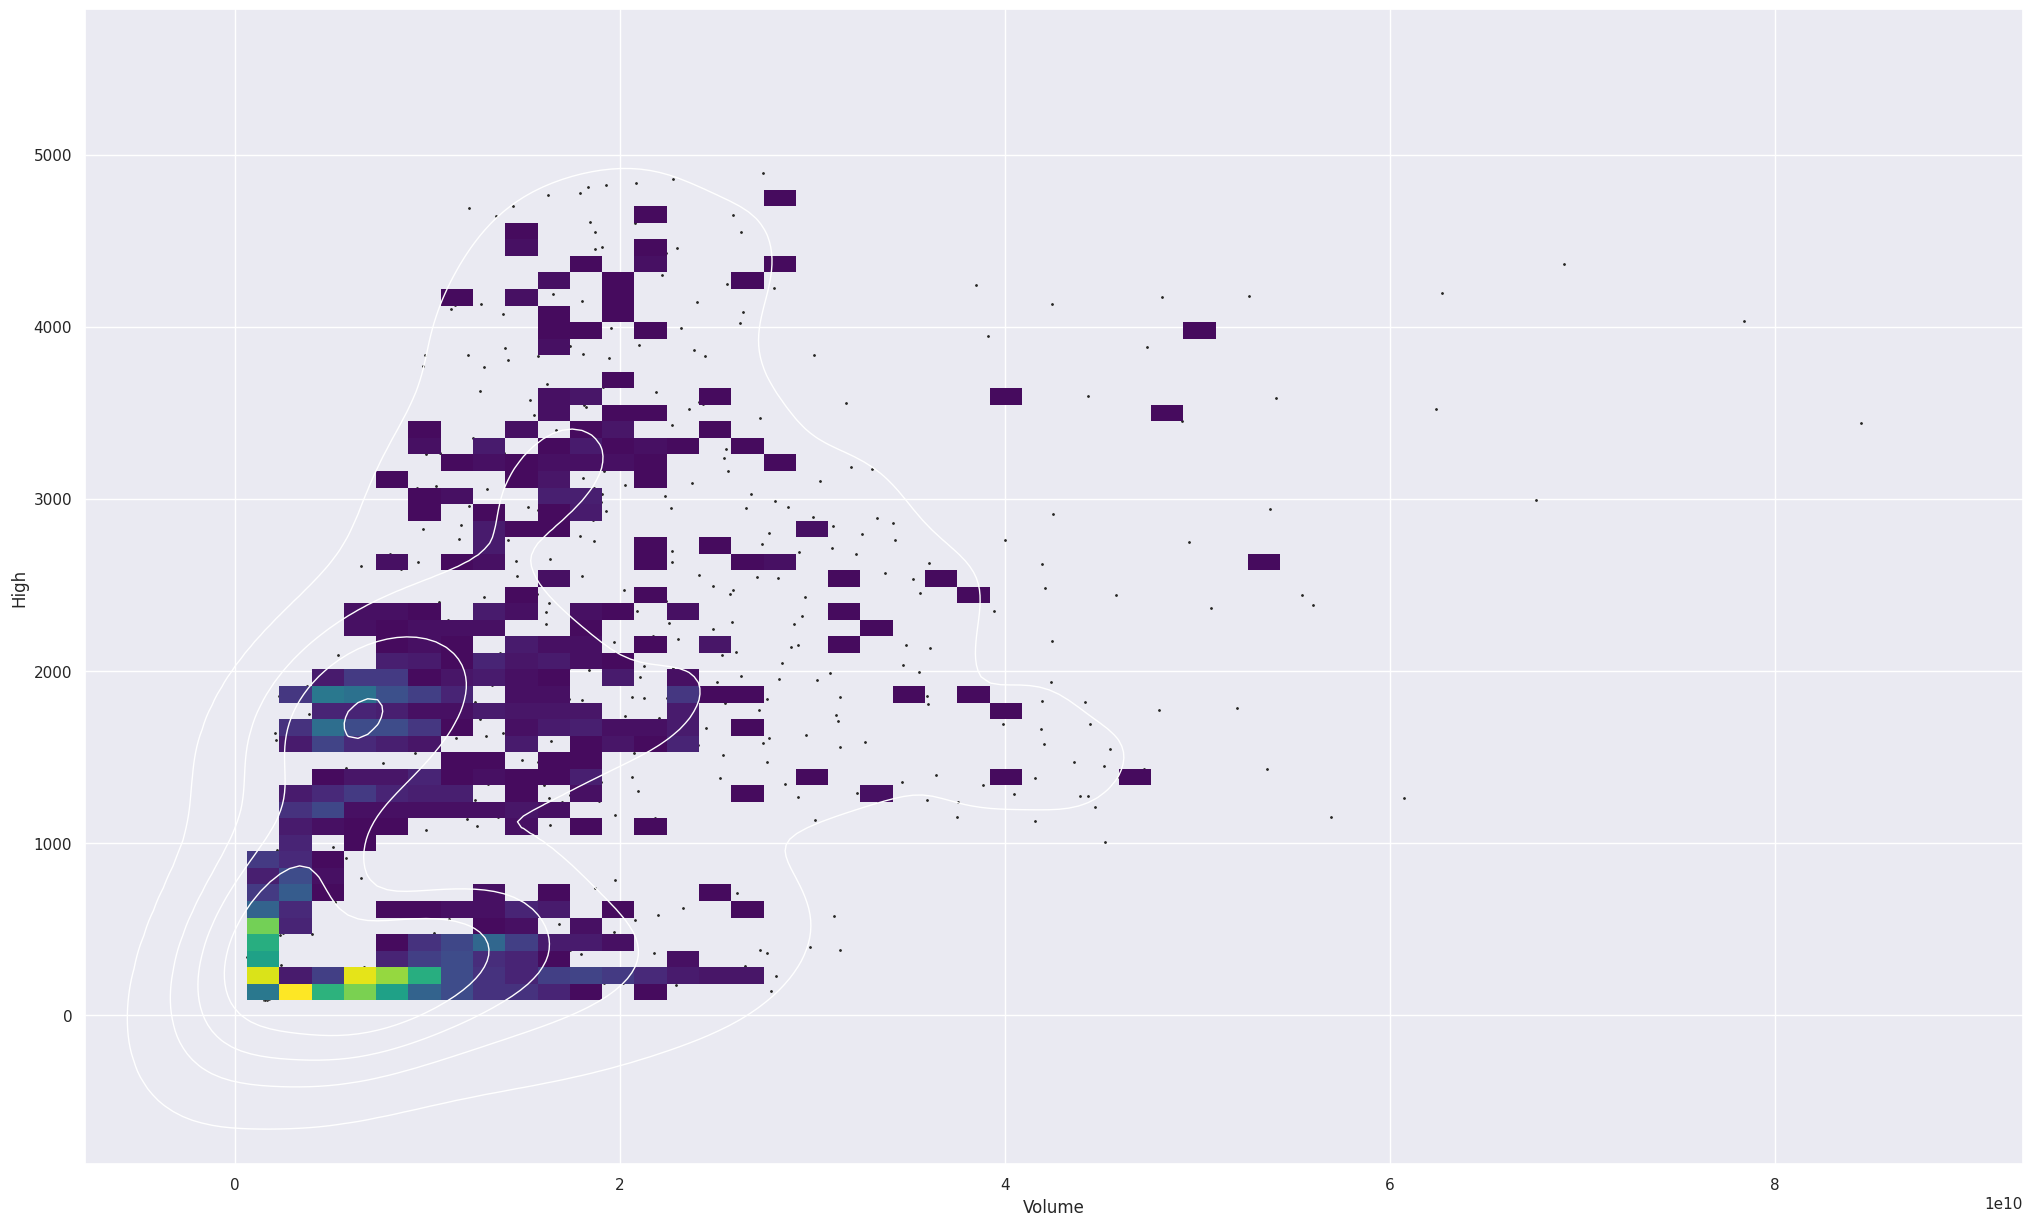

In [ ]:
#Bivariate Gaussian Distribution

# Select two relevant variables
x = df['Volume']
y = df['High']

# Create a combo histogram and scatterplot with density contours
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(25, 15))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="viridis")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

plt.show();

Dealing with Outliers

In [ ]:
# Calculate Q1, Q3, and IQR
#Q1 = df['Volume'].quantile(0.25)
#Q3 = df['Volume'].quantile(0.75)
#IQR = Q3 - Q1

# Define minimum and maximum thresholds and filter out outliers
#min_threshold = Q1 - 1.5 * IQR
#max_threshold = Q3 + 1.5 * IQR
#df_filtered = df[(df['Volume'] >= min_threshold) & (df['Volume'] <= max_threshold)]


In [ ]:
# Calculate Q1 and Q2 (median)
Q1 = df['Volume'].quantile(0.25)
Q2 = df['Volume'].quantile(0.50)  # Median

# Compute the modified IQR
IQR = Q2 - Q1

# Define minimum and maximum thresholds and filter out outliers
min_threshold = Q1 - 1.5 * IQR
max_threshold = Q2 + 1.5 * IQR
df_filtered = df[(df['Volume'] >= min_threshold) & (df['Volume'] <= max_threshold)]

In [ ]:
# Cap outliers at the 1st and 99th percentiles
#low_cap = df['Volume'].quantile(0.01)
#high_cap = df['Volume'].quantile(0.99)

#df['Volume_Capped'] = df['Volume'].clip(lower=low_cap, upper=high_cap)

### Data Preparation for Modeling

In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
print(df.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume']


# Data Preparation:

This part indicates that you're getting your data ready for analysis, which includes splitting the data into different sets.

# Feature Engineering:

Refers to the process of creating dummy variables and ensuring consistent features across your datasets.

# Ethereum Price Prediction:

This aspect of the title clarifies the context and the specific application of the data preparation and feature engineering step

In [ ]:
# Select features and target. Here, we predict 'Close' price based on 'Open', 'High', 'Low', and 'Volume'
#features = ['Open', 'High', 'Low', 'Volume']
#target = 'Adj Close'

#X = df[features]
#y = df[target]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Select features and target. Here, we predict 'Adj Close' price based on 'Open', 'High', 'Low', and 'Volume'
features = ['Open', 'High', 'Low', 'Volume']
target = 'Adj Close'

X = df[features]
y = df[target]

# Splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)
# Further split X_temp and y_temp into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42)

from sklearn.model_selection import train_test_split

#  'X' are your features and 'y' are your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Further split X_temp and y_temp into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

# Setting up the dummies varibles
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that all the column names are in the same order across the datasets
X_val = X_val.reindex(columns = X_train.columns, fill_value=0)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

print(X_train.shape, X_val.shape, X_test.shape)

(1803, 4) (91, 4) (360, 4)
(1803, 4) (91, 4) (360, 4)


# Dataset Splitting:

This indicates the primary operation being performed, which is the partitioning of the dataset into separate subsets.

# Model Training and Evaluation:

This part of the title implies the purpose of splitting the dataset – to facilitate the training of a machine learning model and its subsequent evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' are your features and 'y' are your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Further split X_temp and y_temp into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(1803, 4) (91, 4) (360, 4)


# Feature Encoding:

The creation of dummy variables for categorical features, which is a common preprocessing step in data analysis and machine learning.

# Alignment of Features Across Sets:

Ensuring that all datasets (training, validation, and testing) have the same feature columns in the same order, which is crucial for model consistency and performance.

In [ ]:
# Setting up the dummies varibles
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that all the column names are in the same order across the datasets
X_val = X_val.reindex(columns = X_train.columns, fill_value=0)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

print(X_train.shape, X_val.shape, X_test.shape)

(1803, 4) (91, 4) (360, 4)


# Deep Neural Network LSTM

In [ ]:
from tensorflow.keras import backend as K

# Clearing the Keras backend
K.clear_session()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Initialize the RNN model
model_0 = Sequential()

# Adding the first LSTM layer with Dropout
model_0.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_0.add(Dropout(0.2))

# Adding a second LSTM layer with Dropout
model_0.add(LSTM(units=50, return_sequences=False))
model_0.add(Dropout(0.2))

# Adding a Dense hidden layer
model_0.add(Dense(units=25))

# Adding the output layer
model_0.add(Dense(units=1))

# Compile the model
model_0.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_0.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
57/57 [==============================] - 4s 18ms/step - loss: 2784944.7500 - val_loss: 2616118.0000
Epoch 2/100
57/57 [==============================] - 0s 6ms/step - loss: 2678744.5000 - val_loss: 2499123.2500
Epoch 3/100
57/57 [==============================] - 0s 6ms/step - loss: 2546766.0000 - val_loss: 2356765.7500
Epoch 4/100
57/57 [==============================] - 0s 6ms/step - loss: 2391672.7500 - val_loss: 2191932.7500
Epoch 5/100
57/57 [==============================] - 0s 6ms/step - loss: 2216919.7500 - val_loss: 2016955.0000
Epoch 6/100
57/57 [==============================] - 0s 6ms/step - loss: 2032555.6250 - val_loss: 1823219.2500
Epoch 7/100
57/57 [==============================] - 0s 6ms/step - loss: 1825088.5000 - val_loss: 1620933.8750
Epoch 8/100
57/57 [==============================] - 0s 6ms/step - loss: 1620712.2500 - val_loss: 1425219.5000
Epoch 9/100
57/57 [==============================] - 0s 6ms/step - loss: 1424590.6250 - val_loss: 1233160.1250


The provided log from training your model shows a sequence of 100 epochs with reported training and validation losses. Here are some observations and suggestions:

Decreasing Loss: Both training and validation losses generally decrease, indicating the model is learning. The training loss decreases from 0.0081 to 0.00021048, and the validation loss also decreases overall. This is a good sign that your model is fitting well without apparent overfitting issues.

Val Loss Fluctuations: There are fluctuations in the validation loss, with some epochs showing an increase followed by decreases. This is normal in training dynamics but monitoring for consistent patterns or increases in validation loss can be crucial to detect overfitting.

Low Final Loss: By the 100th epoch, both training and validation losses are quite low, with training loss at approximately 0.00021048 and validation loss at approximately 0.0012. This suggests a good fit, but always consider the context of your problem, the scale of the data, and the specific requirements of the application.

If you're satisfied with the model's performance based on these losses and any other metrics or validation checks you're using, you might consider the model ready for deployment or use. If you're looking to improve or iterate further, consider:

Early Stopping: If not already implemented, use early stopping to halt training when the validation loss doesn't improve for a set number of epochs.
Further Tuning: Adjust learning rates, layer sizes, or experiment with additional layers or different types of layers.
Regularization: If you suspect overfitting later in training or with more complex models, consider adding regularization methods like L1/L2 regularization or dropout.

Cross-Validation: Implement cross-validation if you suspect the model's performance might vary significantly with different data splits.
Since the model seems to perform well based on the provided log, ensure any further changes are justified based on specific performance metrics or business needs relevant to your problem. Always test the model with new, unseen data to validate its predictive capabilities before deployment.

Scatter Plot of Predictions vs. Actual Values:

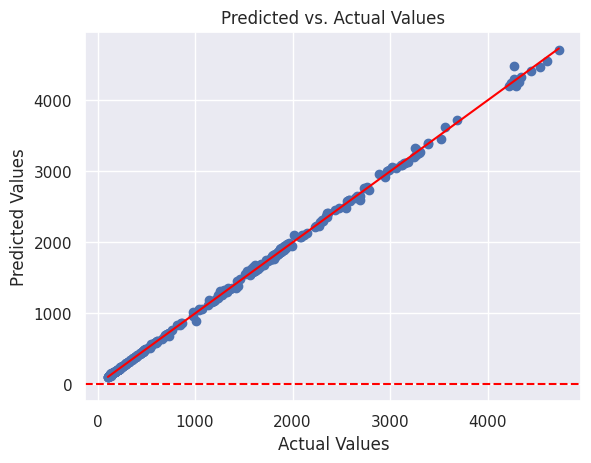

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.show()

Residual Plot:

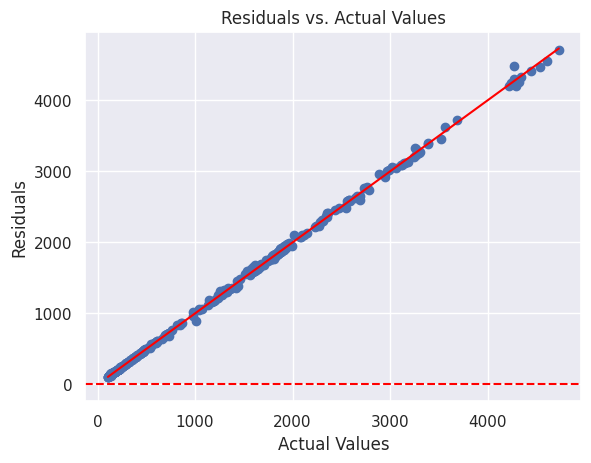

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_test, y_pred)
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.show()

Distribution of Prediction Errors:

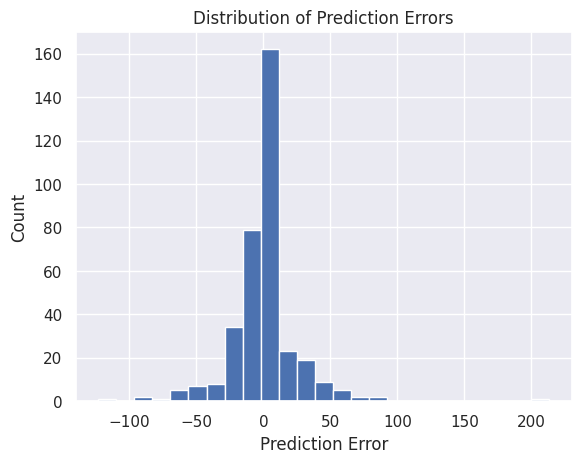

In [ ]:
error = y_pred - y_test
plt.hist(error, bins=25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors")
plt.show()

RNN

In [ ]:
# Clearing the Keras backend
K.clear_session()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Assuming you have preprocessed your data and split it into training and testing sets
# X_train, y_train, X_test, y_test

# Initialize the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularization
# Adjust the units and return_sequences based on your specific case
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularization
# If you're adding a subsequent LSTM layer, remember to set return_sequences=True in the previous one
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
predicted_stock_price = model.predict(X_test)

# Inverse any scaling to bring the predicted values back to original scale
# predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


Epoch 1/100
57/57 [==============================] - 3s 5ms/step - loss: 2804449.7500
Epoch 2/100
57/57 [==============================] - 0s 5ms/step - loss: 2782892.7500
Epoch 3/100
57/57 [==============================] - 0s 5ms/step - loss: 2773954.0000
Epoch 4/100
57/57 [==============================] - 0s 5ms/step - loss: 2766194.2500
Epoch 5/100
57/57 [==============================] - 0s 5ms/step - loss: 2758624.5000
Epoch 6/100
57/57 [==============================] - 0s 5ms/step - loss: 2751186.7500
Epoch 7/100
57/57 [==============================] - 0s 5ms/step - loss: 2743983.7500
Epoch 8/100
57/57 [==============================] - 0s 5ms/step - loss: 2736651.2500
Epoch 9/100
57/57 [==============================] - 0s 5ms/step - loss: 2729574.2500
Epoch 10/100
57/57 [==============================] - 0s 5ms/step - loss: 2722617.5000
Epoch 11/100
57/57 [==============================] - 0s 5ms/step - loss: 2715449.2500
Epoch 12/100
57/57 [==============================] 

Here are some key observations:

Decreasing Loss: The model's loss is decreasing over the epochs, from 0.0076 initially down to 0.00024276 at the last epoch. This is a good sign that the model is learning from the training data.

Stable Training: The training process seems stable without large fluctuations in loss, which suggests that the learning rate and model architecture are reasonably well set up for this task.

Completion of Training: The model has completed the set 100 epochs of training, and you should now have a set of learned weights that can be used to make predictions.

After training, consider the following steps:

Evaluation: Use the model to predict on your test set or validation set and evaluate the performance using appropriate metrics. Since this is a regression task, you might look at RMSE or MAE, as previously discussed.
Visualization: Plot the predictions against the actual values to get a visual sense of how well the model is performing.
Hyperparameter Tuning: Depending on the performance, you might consider tuning the model. This could include adjusting the number of LSTM units, changing the architecture (adding more layers or changing layer types), or adjusting other training parameters like the learning rate or batch size.
Save the Model: If the performance is satisfactory, you might want to save the model for later use or deployment.
Remember, the effectiveness of the model should ultimately be judged in the context of the specific application and the business or research question you're addressing. Always validate the model's predictions against unseen data to ensure it generalizes well.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
mae = mean_absolute_error(y_test, y_pred)

# Print out the scores
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)

Root Mean Squared Error:  5.036754028409456
Mean Absolute Error:  14.320815445228437


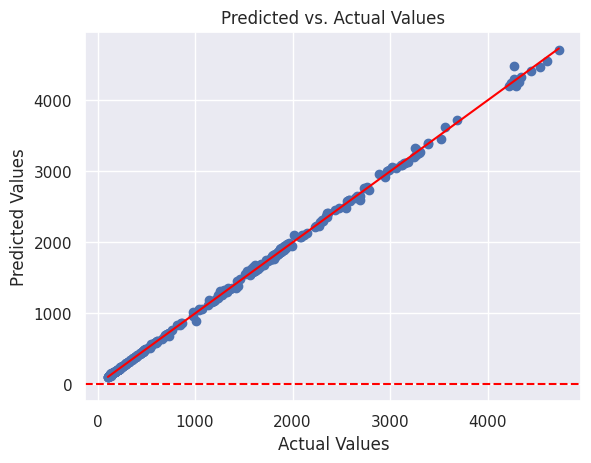

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.show()

In [ ]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))


Length of y_test: 360
Length of y_pred: 360


In [ ]:
y_test_array = np.array(y_test).ravel()
y_pred_array = np.array(y_pred).ravel()

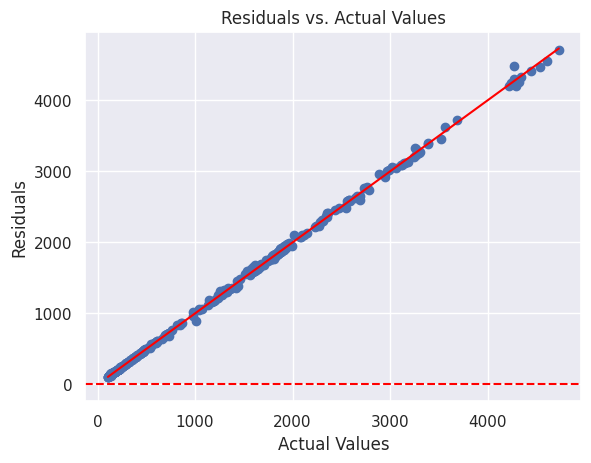

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_test, y_pred)
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.show()

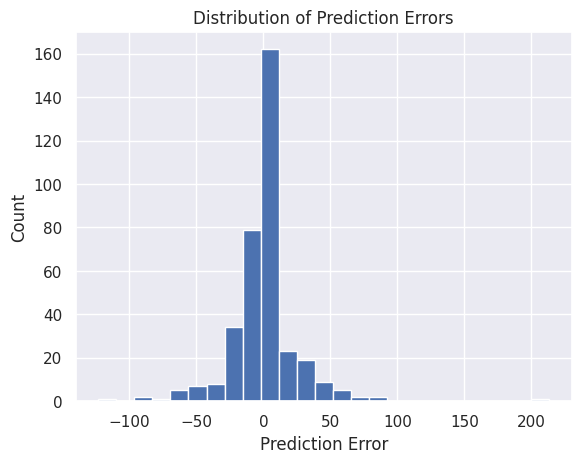

In [ ]:
error = y_pred - y_test
plt.hist(error, bins=25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors")
plt.show()

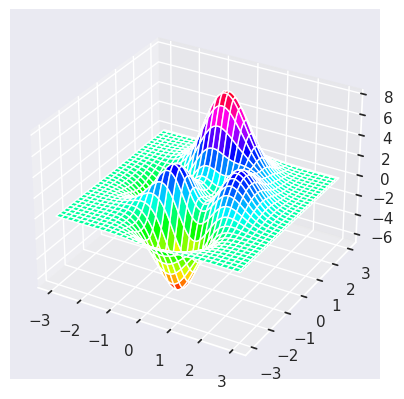

In [ ]:
# Peaks and valley's  3d visual.
x = np.linspace(-3, 3, 101)
y = np.linspace(-3, 3, 101)
x, y = np.meshgrid(x, y)
z = 3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2) - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2) - 1/3 * np.exp(-(x + 1)**2 - y**2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='hsv')  # You can change 'viridis' to any other colormap

# Show the plot
plt.show();